In [1]:
# Import the pandas, numpy, seaborn, pyplot, and stats libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Import the data
data = pd.read_csv("Spice.csv")

In [3]:
# Clean the data
# Remove unnecessary columns
data = data.drop(
    columns=[
        'Domain Code',
        'Domain',
        'Area Code (M49)',
        'Element Code',
        'Item Code (CPC)',
        'Unit'
])

# Rename Area column to territory and Item column to spice
data = data.rename(
    columns={
        'Area': 'territory',
        'Item': 'spice',
        'Export ':'export'
})

# Make column names lowercase
data.columns = [col.lower() for col in data.columns]

# Remove the area "China" to leave the separated China mainland, Hong Kong, Macao, and Taiwan areas
data = data[data['territory'] != "China"]

# Remove rows from years other than 2023
data = data[data['year'] == 2023]

In [4]:
# Prepare to visualize the largest consumers of cinnamon, ginger, and vanilla
# Define spices of interest
target_spices = [
    "Cinnamon and cinnamon-tree flowers, raw",
    "Ginger, raw",
    "Vanilla, raw"
]

# Filter data for the selected spices
filtered = data[data['spice'].isin(target_spices)]

# Group and sum consumption by spice and territory
top_consumers = (
    filtered.groupby(['spice', 'territory'])['consumption']
    .sum()
    .reset_index()
    .sort_values(['spice', 'consumption'], ascending=[True, False])
)

# Get top 5 per spice
top5 = top_consumers.groupby('spice').head(5)

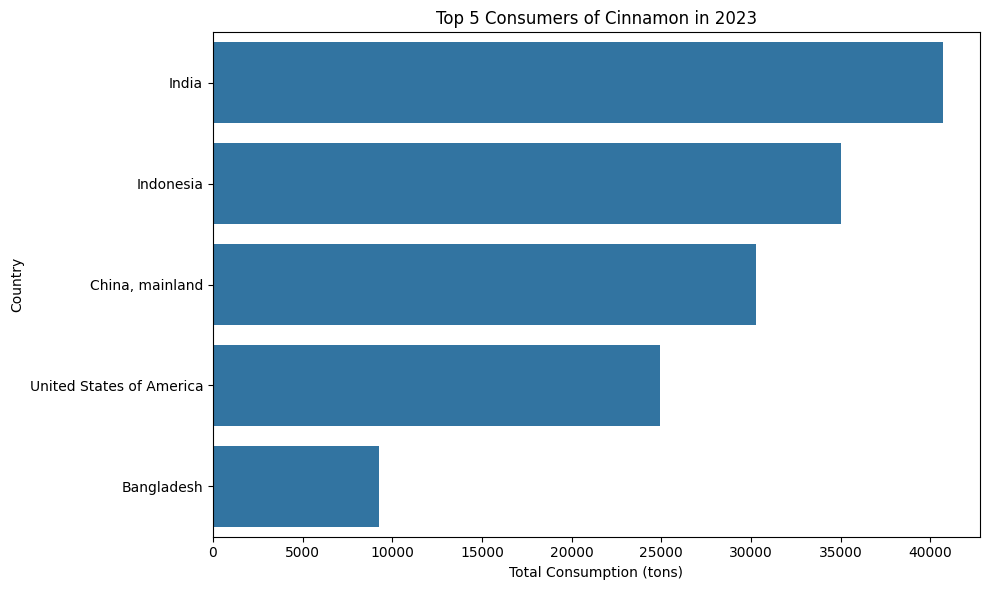

In [5]:
# Plot for Cinnamon
plt.figure(figsize=(10, 6))
sns.barplot(data=top5[top5['spice'] == "Cinnamon and cinnamon-tree flowers, raw"], 
            x='consumption', y='territory')
plt.title('Top 5 Consumers of Cinnamon in 2023')
plt.xlabel('Total Consumption (tons)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

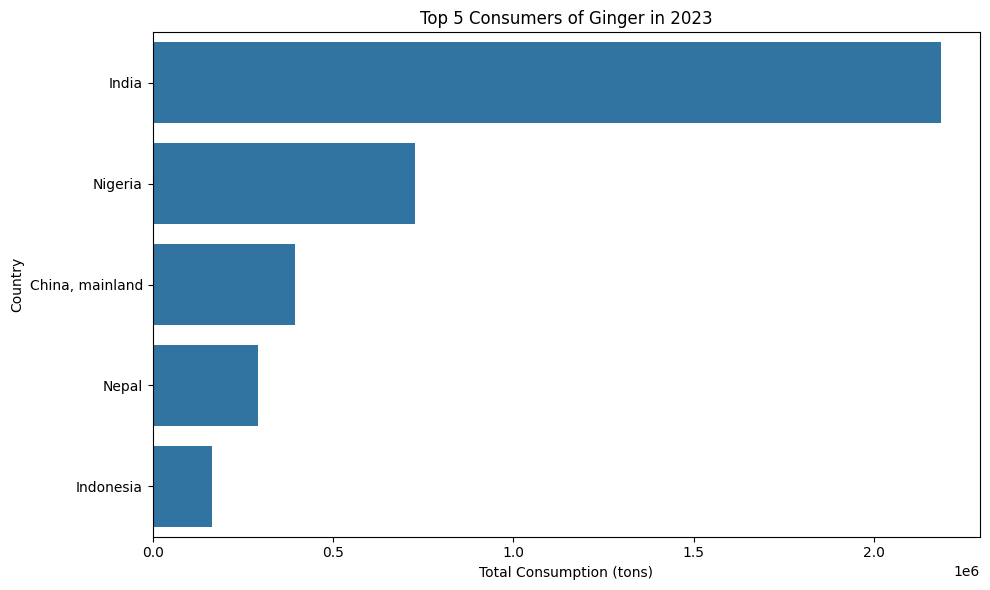

In [6]:
# Plot for Ginger
plt.figure(figsize=(10, 6))
sns.barplot(data=top5[top5['spice'] == "Ginger, raw"], 
            x='consumption', y='territory')
plt.title('Top 5 Consumers of Ginger in 2023')
plt.xlabel('Total Consumption (tons)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

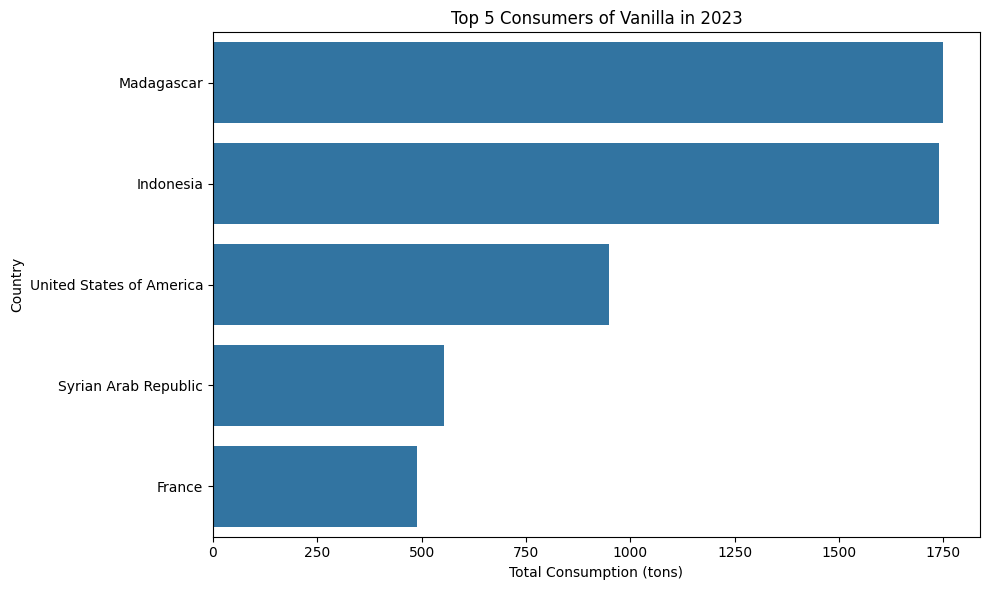

In [7]:
# Plot for Vanilla
plt.figure(figsize=(10, 6))
sns.barplot(data=top5[top5['spice'] == "Vanilla, raw"], 
            x='consumption', y='territory')
plt.title('Top 5 Consumers of Vanilla in 2023')
plt.xlabel('Total Consumption (tons)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

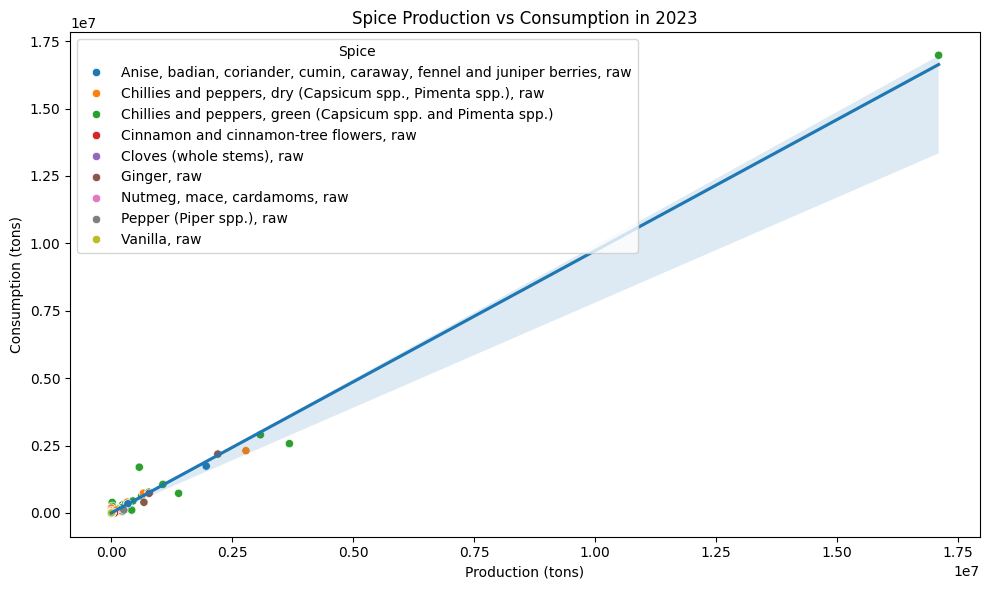

In [8]:
# Visualize the correlation between production and consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production', y='consumption', data=data, hue='spice')
sns.regplot(x='production', y='consumption', data=data, scatter=False)
plt.title('Spice Production vs Consumption in 2023')
plt.xlabel('Production (tons)')
plt.ylabel('Consumption (tons)')
plt.legend(title='Spice')
plt.tight_layout()
plt.show()

In [9]:
# Remove the outlier and prepare to plot again
# Identify the outlier
outlier = data[['territory', 'spice', 'production', 'consumption']].sort_values(
    by=['production', 'consumption'], ascending=False
).head(1)
print("\nOutlier with the highest consumption and production:\n")
print(outlier)

# Remove the matching value from data
data_without_outlier = data[
    ~((data['territory'].isin(outlier['territory'])) &
      (data['spice'].isin(outlier['spice'])) &
      (data['production'].isin(outlier['production'])) &
      (data['consumption'].isin(outlier['consumption'])))
]


Outlier with the highest consumption and production:

            territory                                              spice  \
8746  China, mainland  Chillies and peppers, green (Capsicum spp. and...   

       production  consumption  
8746  17104871.19  16976365.81  


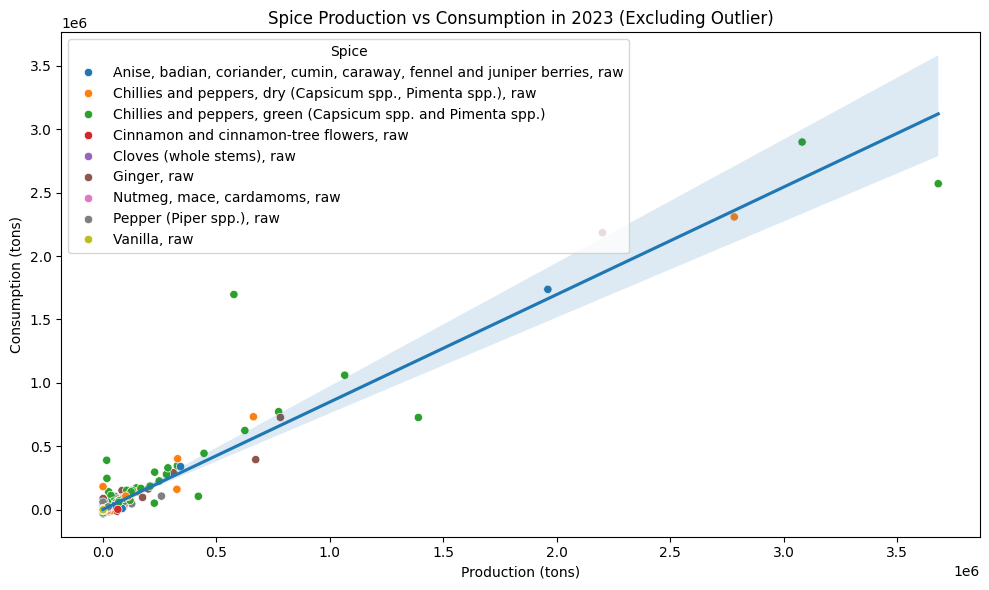

In [10]:
# Visualize the correlation between production and consumption without the outlier of China, mainland
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production', y='consumption', data=data_without_outlier, hue='spice')
sns.regplot(x='production', y='consumption', data=data_without_outlier, scatter=False)
plt.title('Spice Production vs Consumption in 2023 (Excluding Outlier)')
plt.xlabel('Production (tons)')
plt.ylabel('Consumption (tons)')
plt.legend(title='Spice')
plt.tight_layout()
plt.show()

In [11]:
# Prepare to visualize the correlation between import/export ratios and production
# Filter out rows with 0 in export column to prevent divide by zero errors
data_no_zero_export = data[data['export'] > 0].copy()

# Calculate import/export ratio
data_no_zero_export.loc[:, 'import_export_ratio'] = data_no_zero_export['import'] / data_no_zero_export['export']

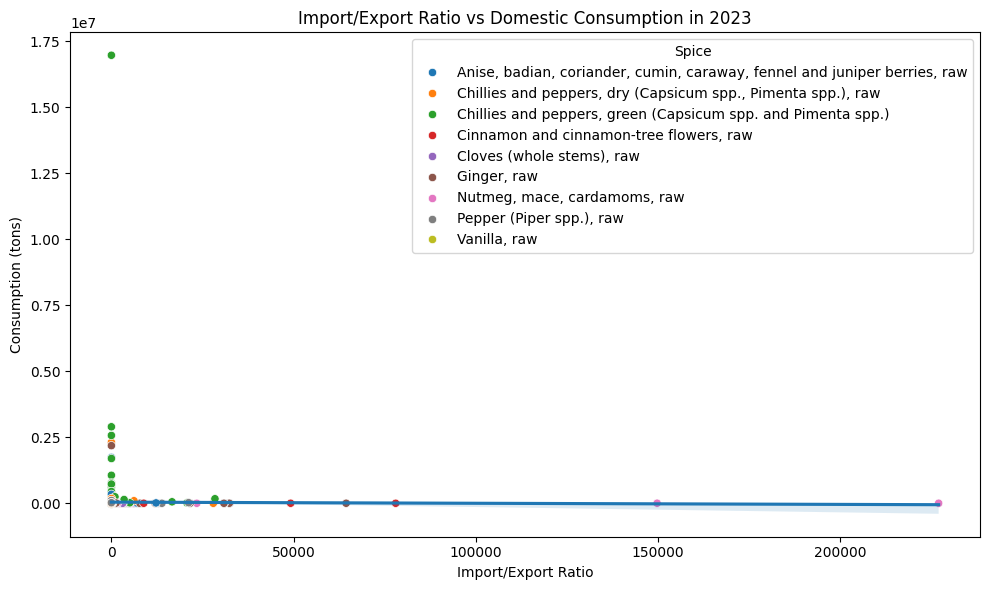

In [12]:
# Visualize the correlation between import/export ratios and production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='import_export_ratio', y='consumption', data=data_no_zero_export, hue='spice')
sns.regplot(x='import_export_ratio', y='consumption', data=data_no_zero_export, scatter=False)
plt.title('Import/Export Ratio vs Domestic Consumption in 2023')
plt.xlabel('Import/Export Ratio')
plt.ylabel('Consumption (tons)')
plt.legend(title='Spice')
plt.tight_layout()
plt.show()

In [13]:
# Remove the outliers and prepare to plot again
# Identify the outliers
outlier_import_export = data_no_zero_export[['territory', 'spice', 'import_export_ratio', 'consumption']] \
    .sort_values(by='import_export_ratio', ascending=False).head(2)
print("Outliers with the highest import/export ratio:\n")
print(outlier_import_export)

outlier_consumption = data_no_zero_export[['territory', 'spice', 'import_export_ratio', 'consumption']] \
    .sort_values(by='consumption', ascending=False).head(1)
print("\nOutlier with the highest consumption:\n")
print(outlier_consumption)

# Remove the matching values from data_no_zero_export
data_without_outliers = data_no_zero_export[
    ~((data_no_zero_export['territory'].isin(outlier_import_export['territory'])) &
       (data_no_zero_export['spice'].isin(outlier_import_export['spice'])) &
       (data_no_zero_export['import_export_ratio'].isin(outlier_import_export['import_export_ratio']))) &
    ~((data_no_zero_export['territory'].isin(outlier_consumption['territory'])) &
      (data_no_zero_export['spice'].isin(outlier_consumption['spice'])) &
      (data_no_zero_export['consumption'].isin(outlier_consumption['consumption'])))
]

Outliers with the highest import/export ratio:

      territory                         spice  import_export_ratio  \
20310      Iraq  Nutmeg, mace, cardamoms, raw             226996.0   
44743     Yemen  Nutmeg, mace, cardamoms, raw             149745.5   

       consumption  
20310      2269.95  
44743      2994.89  

Outlier with the highest consumption:

            territory                                              spice  \
8746  China, mainland  Chillies and peppers, green (Capsicum spp. and...   

      import_export_ratio  consumption  
8746             0.191479  16976365.81  


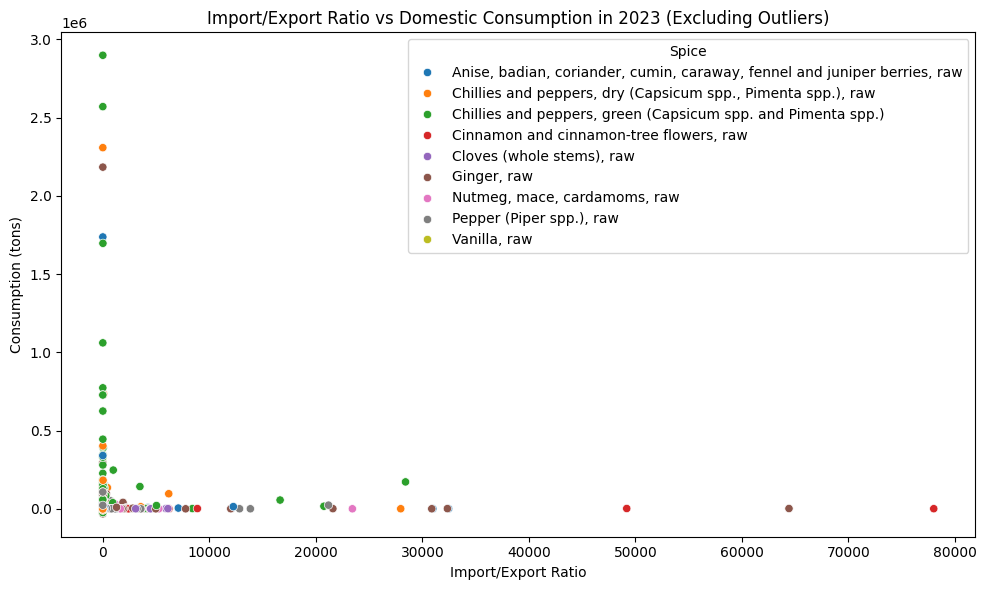

In [14]:
# Visualize the correlation between import/export ratios and production without the outliers of Iraq, Yemen, and China, mainland
plt.figure(figsize=(10, 6))
sns.scatterplot(x='import_export_ratio', y='consumption', data=data_without_outliers, hue='spice')
plt.title('Import/Export Ratio vs Domestic Consumption in 2023 (Excluding Outliers)')
plt.xlabel('Import/Export Ratio')
plt.ylabel('Consumption (tons)')
plt.legend(title='Spice')
plt.tight_layout()
plt.show()

In [25]:
# Simulate a nonparametric inference of the median for imports using bootstrapping
# Sample 10% of the data randomly
sample_data = data['import'].sample(n=int(len(data) * 0.1))

# Calculate the sample median
sample_median = np.median(sample_data)

# Perform bootstrapping
bootstrap_result = stats.bootstrap(
    (sample_data,),
    np.median,
    n_resamples=1000,
)

print(f"Bootstrap Median: {sample_median}")
print("95% confidence interval for the Median of Imports: " f"{bootstrap_result.confidence_interval.low:.2f} to {bootstrap_result.confidence_interval.high:.2f}")

Bootstrap Median: 100.74
95% confidence interval for the Median of Imports: 43.40 to 229.95
